In [36]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Задача 1  
Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.

In [187]:
x = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])

In [39]:
size = 1000
x = np.random.randint(-5, 5, (size, size))

1)Полная векторизация

In [40]:
%%timeit
diag = x.diagonal()
diag[diag != 0].prod()

11.2 µs ± 724 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


2)Без векторизации

In [42]:
%%timeit
size = x.shape
p = 1

for i in np.arange(size[0]):
    for j in np.arange(size[1]):
        if (i == j) and (x[i,j] != 0):
            p *= x[i,j]

120 ms ± 6.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


3)Частичная векторизация

In [46]:
%%timeit
diag = x.diagonal()
n = diag.size
p = 1
for i in np.arange(n):
    if (diag[i] != 0):
        p *= diag[i]


778 µs ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
print(p)

Задача 2  
Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

In [51]:
size = 10000
x = np.random.randint(0, 100, (size, size))
i = np.random.randint(0, size, (size, 1))
j = np.random.randint(0, size, (size, 1))

In [48]:
x, i.reshape(1,-1), j.reshape(1,-1)

(array([[ 7, 33,  4, ..., 75, 95, 49],
        [15, 44, 38, ...,  6, 77, 54],
        [79,  2, 87, ..., 25, 79, 66],
        ...,
        [ 2, 25, 86, ..., 16, 28, 25],
        [84, 31, 93, ..., 11, 31, 49],
        [59, 29, 86, ..., 32, 82, 35]]),
 array([[612, 132, 336, 696, 738, 280, 928, 499, 194, 972, 886, 546, 584,
         999, 529, 242, 465,  23, 430,  95, 230, 155, 899, 709, 380, 506,
         378, 901, 372, 444, 543, 427, 929, 655, 452, 155,  73, 820, 563,
         632, 405, 662, 894, 849,  95, 274, 362, 438, 358, 852,  62, 757,
         912, 499, 406, 115, 631, 349,  49, 616, 366, 711, 824, 124, 237,
         722, 525, 558, 928, 809, 928, 794, 808, 309, 265, 519, 519, 239,
         519, 666, 562, 270, 118, 514, 643, 438, 509, 402, 441, 647, 822,
         104, 393, 849, 395, 518, 387, 437, 272, 628, 724, 961, 172, 203,
         673, 655, 900, 425, 755, 489, 440, 323, 647, 243, 551, 258, 270,
         985, 706, 265,  48, 295, 838, 686, 334,  49, 753, 239, 198, 413,
         21

1) Векторизованный

In [52]:
%%timeit
arng = np.arange(size)
np.array([x[i[t], j[t]] for t in arng])

45.2 ms ± 3.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [281]:
print(np.array([x[i[t], j[t]] for t in np.arange(size)]))

[[30]
 [57]
 [42]
 [66]
 [66]
 [ 6]
 [ 1]
 [ 9]
 [63]
 [11]]


2) Без использования векторизации

In [53]:
%%timeit
t = np.zeros_like(i)
for k in np.arange(size):
    t[k] = x[i[k], j[k]]

46.8 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [280]:
print(t)

[[30]
 [57]
 [42]
 [66]
 [66]
 [ 6]
 [ 1]
 [ 9]
 [63]
 [11]]


Задача 3  
Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.

In [269]:
x = np.array([1, 2, 4, 3, 3])
y = np.array([4, 3, 1, 2, 3])

In [60]:
size = 1000
x = np.random.randint(0, 5, (size))
y = np.random.randint(0, 5, (size))

1) Векторизованный

In [61]:
%%timeit
(np.bincount(x) == np.bincount(y))

8.63 µs ± 536 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [327]:
print((np.bincount(x) == np.bincount(y)).all())

True


2)Без векторизации

In [62]:
%%timeit
def fill_dict(t, vector):
    for i in vector:
        if i not in t:
            t[i] = 1
        else:
            t[i] += 1
            
dict_x = dict()
dict_y = dict()
fill_dict(dict_x, x)
fill_dict(dict_y, y)
dict_x == dict_y

561 µs ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [315]:
print(dict_x == dict_y)

True

Задача 4  
Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

In [247]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

In [66]:
size = 1000
x = np.random.randint(-5, 5, (size))

1) Векторизация

In [67]:
%%timeit
t = np.where(x == 0)[0]
size = x.size
x[t[t != size - 1] + 1].max()

14 µs ± 599 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [251]:
t = np.where(x == 0)[0]
size = x.size
print(x[t[t != size - 1] + 1].max())

5


2) Без использования векторизации

In [68]:
%%timeit
t = np.array([], dtype = int)
for i in np.arange(x.size - 1):
    if (x[i] == 0):
        t = np.hstack((t, int(i)))

1.29 ms ± 65.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [254]:
t = np.array([], dtype = int)
for i in np.arange(x.size - 1):
    if (x[i] == 0):
        t = np.hstack((t, int(i)))
print(x[t + 1].max())

5


Задача 5  
Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

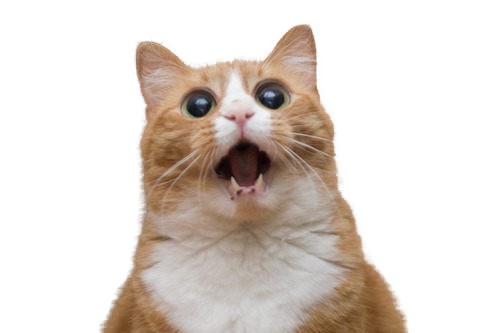

In [1]:
import scipy
import numpy as np
import imageio
from IPython.display import Image

x = np.array([0.299, 0.587, 0.114])
im = imageio.imread('./data/котик.png')
Image('./data/котик.png')

1) С векторизацией

In [4]:
%%timeit
def weighted_sum(y):
    return y.sum()
weighted_sum_vec = np.vectorize(weighted_sum, otypes = [int], signature = '(n)->()')
im_bw = weighted_sum_vec(im[:,:, 0:3] * x)

imageio.imwrite('bw_cat_v.png', im_bw.astype(np.uint8))
# Image('серый_котик1.png')

2.22 s ± 92.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


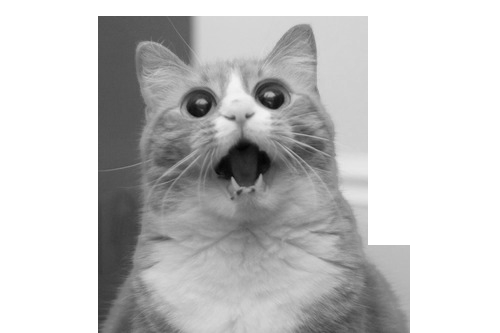

In [5]:
Image('bw_cat_v.png')

2) Без векторизации

In [6]:
%%timeit
im_bw = np.zeros((im.shape[0], im.shape[1]))
t = im[:, :, 0:3] * x
for i in np.arange(im.shape[0]):
    for j in np.arange(im.shape[1]):
        im_bw[i,j] = t[i,j].sum()
imageio.imwrite('bw_cat.png', im_bw.astype(np.uint8))
# Image('серый_котик.png')

1.73 s ± 190 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


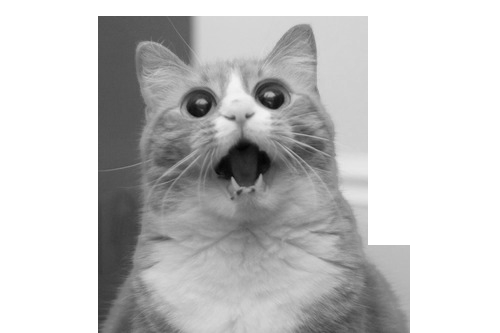

In [7]:
Image('bw_cat.png')

Задача 6  
Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.

In [273]:
x = np.array([2, 2, 2, 3, 3, 3, 5])

1) С векторизацией

In [278]:
%%timeit
count = np.bincount(x)
(count[count != 0]), (np.unique(x))

12.3 µs ± 251 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [277]:
print((count[count != 0], np.unique(x)))

(array([3, 3, 1], dtype=int64), array([2, 3, 5]))


2) Без векторизации

In [302]:
%%timeit
def fill_dict(t, vector):
    for i in vector:
        if i not in t:
            t[i] = 1
        else:
            t[i] += 1
dict_x = {}
fill_dict(dict_x, x)

2.81 µs ± 75.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [300]:
print(np.array([*dict_x]))
print(np.array([*dict_x.values()]))

[2 3 5]
[3 3 1]


Задача 7  
Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

In [69]:
from scipy.spatial.distance import cdist

In [74]:
size = 100
n = np.random.randint(1, size)
k = np.random.randint(1, size)
m = np.random.randint(1, size)
x = np.random.randn(n, m) * 10
y = np.random.randn(k, m) * 10

In [75]:
n, m, k

(93, 51, 37)

In [72]:
print(x)
print(y)

[[ -7.22219946   6.10545841 -11.40013431  -3.14494541  20.63979342
    8.64767128]
 [ 27.86226508   7.24230417  -4.11498153  -3.88552495  -2.49518961
    3.76043683]
 [ -2.84022488   8.88123124 -13.14935911  -5.62748159  -6.06877525
   14.73033564]
 [ 14.31875829  -7.83855568 -14.09080503 -10.26289916  13.93907374
   -6.58588417]
 [-19.08355472  -1.79492821  -1.74949621  11.82607736  -7.52977381
   -0.33789293]
 [ 19.85733425   7.71157288 -10.17434626  -8.01130198   3.83804588
   10.92363258]
 [  9.14821287  -5.45061972  -8.90025101   2.69541672  -4.96604149
   -4.18967387]
 [ 25.54965763 -19.284744   -13.05782691  -7.0828609   10.62236888
   -4.78210055]]
[[ 10.93807046  -8.26537643   1.94864086  12.11375841   6.21680988
  -10.11674195]]


1) С векторизацией

In [76]:
%%timeit
def r(a, b):
    return ((a - b)**2).sum() ** (0.5)

def assemble(x, y):
    return r_v(x, y)

r_v = np.vectorize(r, signature = '(m),(m)->()')
assemble_v = np.vectorize(assemble, signature = '(n,m),(m)->(n)')
t = assemble_v(x, y).T

34.4 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [617]:
print(t)

[[ 3.50104285  9.6713805   6.06253234]
 [22.02792339 27.03347583 15.19320323]
 [17.23222144 23.30703471 22.92791494]
 [21.05130472 25.52589605 13.54018481]]


2) Без векторизации

In [77]:
%%timeit
t = np.zeros((x.shape[0], y.shape[0]))
for i in np.arange(x.shape[0]):
    for j in np.arange(y.shape[0]):
        t[i,j] = ((x[i]-y[j])**2).sum()**(0.5)

19.6 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [619]:
print(t)

[[ 3.50104285  9.6713805   6.06253234]
 [22.02792339 27.03347583 15.19320323]
 [17.23222144 23.30703471 22.92791494]
 [21.05130472 25.52589605 13.54018481]]


In [621]:
# %%timeit 
cdist(x, y, 'euclidean')

array([[ 3.50104285,  9.6713805 ,  6.06253234],
       [22.02792339, 27.03347583, 15.19320323],
       [17.23222144, 23.30703471, 22.92791494],
       [21.05130472, 25.52589605, 13.54018481]])

<b>Вывод</b>: не всегда векторизация это добро, но зачастую numpy знает, что делает!